In [1]:
from dataclasses import dataclass

import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from tqdm import tqdm

from uot import UOT, EntRegUOT
from uot import exact_uot, exact_entreg_uot
from uot import calc_B, calc_f
from sinkhorn import calc_U, sinkhorn_entreg_uot, sinkhorn

np.random.seed(3698)

## Experiments

### Synthetic data

#### Configuration

In [2]:
# Dimension
n = 10

# Regularization
tau = np.float64(5.0)

# Mass normalization
alpha = 2.0
beta = 4.0

# Number of eps
neps = 20

#### Generation

In [3]:
np.random.seed(3698)

# Cost matrix
C = np.random.uniform(low=1.0, high=50.0, size=(n, n)).astype(np.float64)
C = (C + C.T) / 2.0

# Marginal vectors
a = np.random.uniform(0.1, 1.0, size=n).astype(np.float64)
b = np.random.uniform(0.1, 1.0, size=n).astype(np.float64)

a = a / a.sum() * alpha
b = b / b.sum() * beta

#### Scenarios

In [4]:
# Original UOT problem
uot_p = UOT(C, a, b, tau)

# Optimal solution
f_optimal, X_optimal = exact_uot(uot_p)

print('Optimal:', f_optimal)

Optimal: 20.90467378709561


##### Different accuracy epsilon

In [5]:
# Epsilons
eps_arr = np.linspace(start=1.0, stop=0.05, num=neps).astype(np.float64)

kfs, kcs = np.zeros((2, neps))

for i, eps in enumerate(eps_arr):
    # Entropic regularization parameter
    U = calc_U(uot_p, eps)
    eta = eps / U

    # Convert to Entropic Regularized UOT
    p = EntRegUOT(C, a, b, tau, eta)
    g_best, u_opt, v_opt = exact_entreg_uot(p)

    # Sinkhorn
    _, log = sinkhorn_entreg_uot(p, eps)

    # Find kf
    kf = log['k_stop']

    # Find kc
    f_approx = np.array([
        calc_f(p, calc_B(p, u, v))
        for u, v in zip(log['u'], log['v'])
    ])
    kc = np.where(f_approx - f_optimal > eps)[0][-1]

    kfs[i] = kf
    kcs[i] = kc + 2

/home/vltanh/Documents/ComputationalOT/UnbalancedOT/uot.py:63: RuntimeWarning: invalid value encountered in add
  return np.exp((u[:, np.newaxis] + v[np.newaxis, :] - p.C) / p.eta)
/home/vltanh/Documents/ComputationalOT/UnbalancedOT/uot.py:63: RuntimeWarning: invalid value encountered in exp
  return np.exp((u[:, np.newaxis] + v[np.newaxis, :] - p.C) / p.eta)
/home/vltanh/miniconda3/envs/ot/lib/python3.9/site-packages/numpy/core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


IndexError: index -1 is out of bounds for axis 0 with size 0

/tmp/ipykernel_62343/1876823614.py:3: RuntimeWarning: divide by zero encountered in log
  ax[0].plot(eps_arr, np.log(kcs), label='\log k_f')
/tmp/ipykernel_62343/1876823614.py:4: RuntimeWarning: divide by zero encountered in log
  ax[0].plot(eps_arr, np.log(kfs), label='\log k_c')
/tmp/ipykernel_62343/1876823614.py:7: RuntimeWarning: invalid value encountered in true_divide
  ax[1].plot(eps_arr, kfs / kcs, label='\log k_f')


(1.05, -0.05)

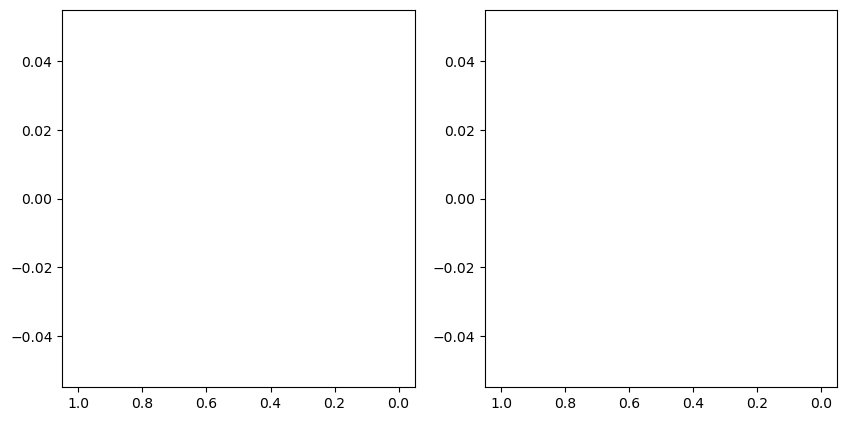

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=100)

ax[0].plot(eps_arr, np.log(kcs), label='\log k_f')
ax[0].plot(eps_arr, np.log(kfs), label='\log k_c')
ax[0].set_xlim(1.0 + 0.05, 0 - 0.05)

ax[1].plot(eps_arr, kfs / kcs, label='\log k_f')
ax[1].set_xlim(1.0 + 0.05, 0 - 0.05)

##### Code

In [7]:
# Dimension
n = 100

# Regularization
tau = np.float64(1.0)
eta = np.float64(0.05)

# Mass normalization
# alpha = 2.0
# beta = 4.0

# Number of eps
# neps = 20

In [8]:
np.random.seed(3698)

# Cost matrix
C = np.random.uniform(low=1.0, high=100.0, size=(n, n)).astype(np.float64)
C = (C + C.T) / 2.0

# Marginal vectors
a = np.random.uniform(0.1, 10.0, size=n).astype(np.float64)
b = np.random.uniform(0.1, 10.0, size=n).astype(np.float64)

In [9]:
# Convert to Entropic Regularized UOT
p = EntRegUOT(C, a, b, tau, eta)
g_best, u_opt, v_opt = exact_entreg_uot(p)

WARNING - large complementary slackness residual: 28.571997


In [10]:
_, log = sinkhorn(p, 100)

/home/vltanh/Documents/ComputationalOT/UnbalancedOT/uot.py:63: RuntimeWarning: invalid value encountered in add
  return np.exp((u[:, np.newaxis] + v[np.newaxis, :] - p.C) / p.eta)
/home/vltanh/Documents/ComputationalOT/UnbalancedOT/uot.py:63: RuntimeWarning: invalid value encountered in exp
  return np.exp((u[:, np.newaxis] + v[np.newaxis, :] - p.C) / p.eta)
/home/vltanh/miniconda3/envs/ot/lib/python3.9/site-packages/numpy/core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [11]:
log

{'u': [array([        nan,  8.81451089,  2.90264457,  1.75053648,  5.25516997,
          4.14620461,  9.4806938 ,  9.86842683,  3.8392479 ,  4.86285735,
          6.93016755,  4.70599886,  3.78539274,  9.38043772,  3.64440965,
          3.68989768,  7.60907714,  4.94855432,  8.9824202 ,  2.74563156,
         10.81156174,  8.44268055,  6.87626752,  4.48825658,  3.7852513 ,
          2.74351099,  1.76711996,  6.49251825,  8.03327772,  7.05901952,
         11.14143184,  4.546849  , 10.10974893,  7.95880355,  8.02058515,
          6.19962312,  6.56434413,  4.15576   ,  4.45986216,  5.48460859,
          5.7755695 ,  5.71455541,  6.07954173, 10.3812142 ,  5.05046898,
          6.07350351,  2.60673615,  4.20242184,  4.62447949,  9.21599312,
          4.94597657,  9.62137764,  7.88005731,  3.13805199,  9.19165734,
          3.21763755,  5.47498159,  3.79501144, 10.41663913,  4.97145798,
          6.66263628,  5.29739473,  3.79328127,  4.7067439 ,  4.50713214,
          5.57113726,  9.22336318